In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error


In [ ]:
def clean_excel_df(df):
    new_header = df.iloc[0]
    df = df[1:]
    df.columns = new_header
    df['Date'] = pd.to_datetime(df['Date'])
    df['CoughX'] = df['CoughX'].astype(float)
    df['InfeX'] = df['InfeX'].astype(float)
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['month_count'] = 1
    df['month_count'] = df['month_count'].cumsum()
    return df


In [ ]:
data_part1 = pd.read_excel('Rohan Sindhoora Demand_Data_2017-2018.xlsx')
data_part1 = clean_excel_df(data_part1)
data_part1.head()

,Date,CoughX,InfeX,CoughX - Exp Smoothing,InfeX - Exp Smoothing,year,month,month_count
1,2017-01-01,132966.97,66497.86,NaN,NaN,2017,1,1
2,2017-02-01,114928.62,52188.43,NaN,NaN,2017,2,2
3,2017-03-01,104504.07,68276.89,NaN,NaN,2017,3,3
4,2017-04-01,90812.60,75858.50,NaN,NaN,2017,4,4
5,2017-05-01,71431.42,102014.24,NaN,NaN,2017,5,5


In [ ]:
data_part1.columns

Index(['Date', 'CoughX', 'InfeX', 'CoughX - Exp Smoothing',
       'InfeX - Exp Smoothing', 'year', 'month', 'month_count'],
      dtype='object', name=0)

In [ ]:
data_part2 = pd.read_excel('Demand_Data_2017-2019.xlsx')
data_part2 = clean_excel_df(data_part2)
#data_part2.columns = data_part2.columns
data_part2.columns = ['Date', 'CoughX', 'InfeX', 'CoughX - Avg', 'InfeX - Avg',
                      'CoughX - Exp Smoothing', 'InfeX - Exp Smoothing',
                      'year', 'month', 'month_count']
data_part2.head()

,Date,CoughX,InfeX,CoughX - Avg,InfeX - Avg,CoughX - Exp Smoothing,InfeX - Exp Smoothing,year,month,month_count
1,2017-01-01,132966.97,66497.86,NaN,NaN,NaN,NaN,2017,1,1
2,2017-02-01,114928.62,52188.43,NaN,NaN,NaN,NaN,2017,2,2
3,2017-03-01,104504.07,68276.89,NaN,NaN,NaN,NaN,2017,3,3
4,2017-04-01,90812.60,75858.50,NaN,NaN,NaN,NaN,2017,4,4
5,2017-05-01,71431.42,102014.24,NaN,NaN,NaN,NaN,2017,5,5


### Accuracy of Predictions From Part 1

In [ ]:
def print_accuracy(data_part1, data_part2, col, pred_type):
    pred_2019 = data_part1[data_part1['year']==2019]
    actual_2019 = data_part2[data_part2['year']==2019]

    plt.figure(figsize=(15,5))
    plt.grid()
    plt.title(f'{col} Predicted Vs. Actual')
    plt.plot(pred_2019['month'], pred_2019[f'{col} - {pred_type}'], color='green', label='Predicted')
    plt.plot(actual_2019['month'], actual_2019[col], color='blue', label='Actual')
    plt.legend()

    mse = np.sqrt(mean_squared_error(actual_2019[col], pred_2019[f'{col} - {pred_type}']))
    mape = np.round(np.mean(
            np.abs(actual_2019[col] - pred_2019[f'{col} - {pred_type}']) / actual_2019[col]) * 100, 2)

    print('mse: ', mse)
    print('mape: ', mape)

    return

mse:  46400.048100338216
mape:  37.06


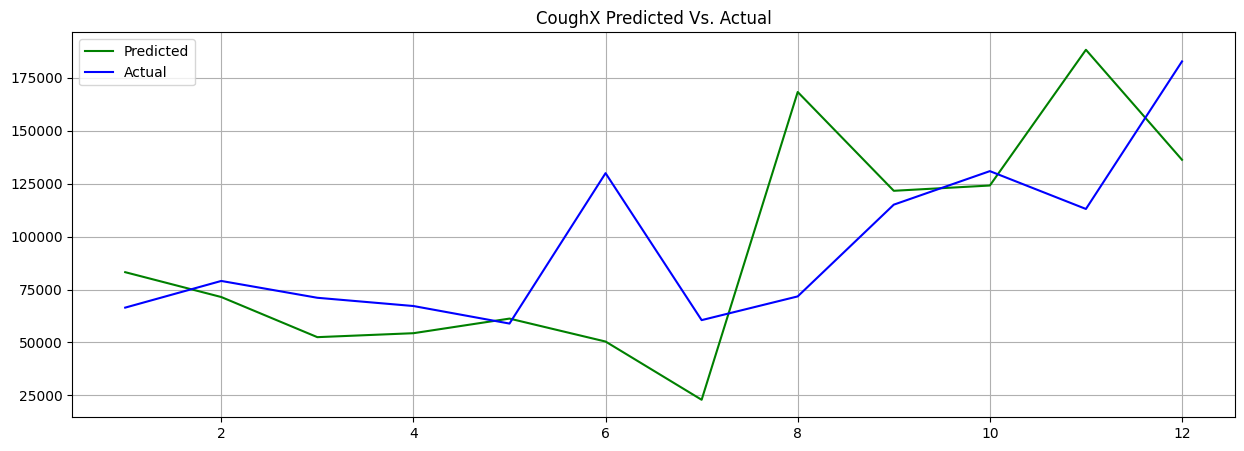

In [ ]:
print_accuracy(data_part1, data_part2, 'CoughX', 'Exp Smoothing')

mse:  25958.795902126287
mape:  71.23


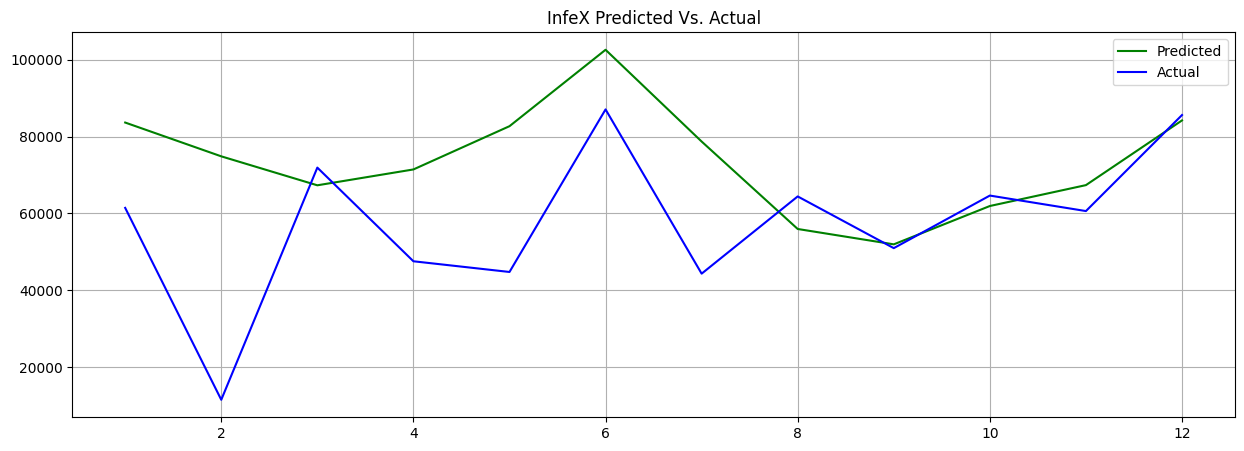

In [ ]:
print_accuracy(data_part1, data_part2, 'InfeX', 'Exp Smoothing')

#### Simple Average Predictions

In [ ]:
data_part1['CoughX_shifted_1y'] = data_part1['CoughX'].shift(12)
data_part1['CoughX_shifted_2y'] = data_part1['CoughX'].shift(24)
data_part1['InfeX_shifted_1y'] = data_part1['InfeX'].shift(12)
data_part1['InfeX_shifted_2y'] = data_part1['InfeX'].shift(24)
data_part1['CoughX - Average'] = (data_part1['CoughX_shifted_1y'] + data_part1['CoughX_shifted_2y']) / 2
data_part1['InfeX - Average'] = (data_part1['InfeX_shifted_1y'] + data_part1['InfeX_shifted_2y']) / 2

mse:  39920.13214623794
mape:  32.75


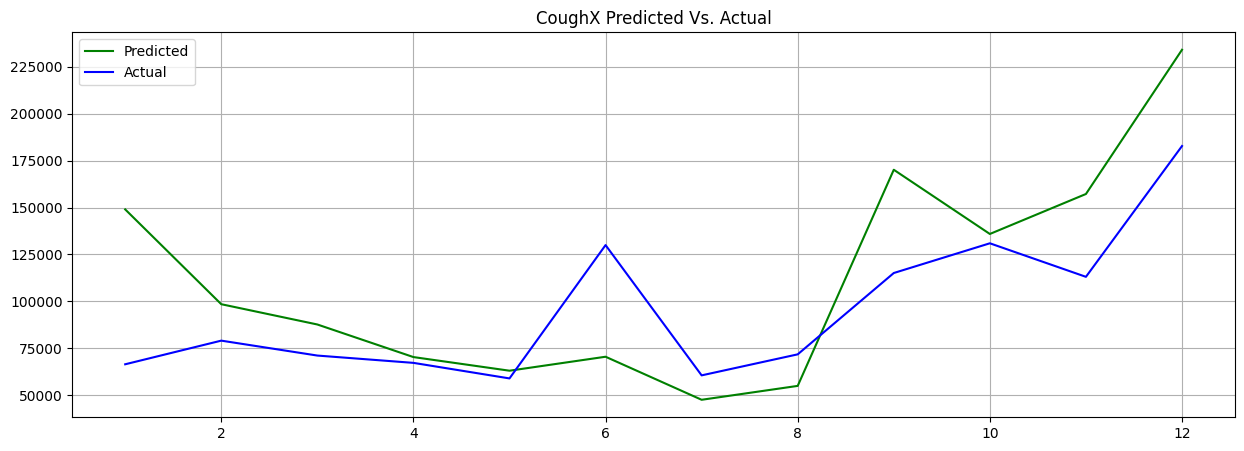

In [ ]:
print_accuracy(data_part1, data_part2, 'CoughX', 'Average')

mse:  28275.566783892602
mape:  72.79


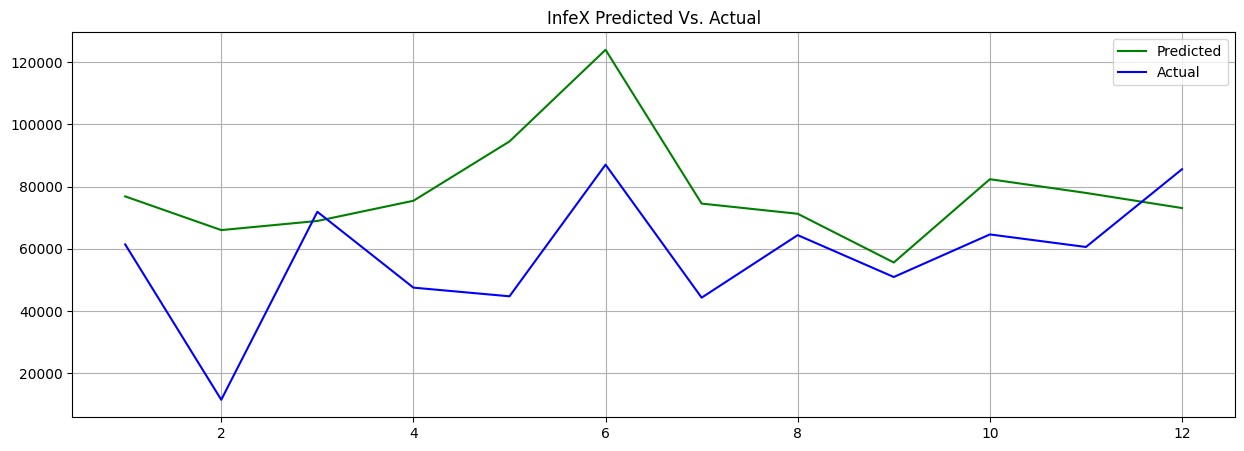

In [ ]:
print_accuracy(data_part1, data_part2, 'InfeX', 'Average')

In [ ]:
data_part2['CoughX_shifted_1y'] = data_part2['CoughX'].shift(12)
data_part2['CoughX_shifted_2y'] = data_part2['CoughX'].shift(24)
data_part2['CoughX_shifted_3y'] = data_part2['CoughX'].shift(36)
data_part2['CoughX - Average'] = (data_part2['CoughX_shifted_1y'] +
                                  data_part2['CoughX_shifted_2y'] +
                                  data_part2['CoughX_shifted_3y']) / 3
data_part2['CoughX - Average']

1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
30              NaN
31              NaN
32              NaN
33              NaN
34              NaN
35              NaN
36              NaN
37    121519.910000
38     92030.220000
39     82172.183333
40     69294.076667
41     61686.653333
42     90335.636667
43     51896.433333
44     60567.126667
45    151820.513333
46    134282.360000
47    142529.893333
48    217013.993333
Name: CoughX - Average, dtype: float64

In [ ]:
data_part2['InfeX_shifted_1y'] = data_part2['InfeX_outliers_removed'].shift(12)
data_part2['InfeX_shifted_2y'] = data_part2['InfeX_outliers_removed'].shift(24)
data_part2['InfeX_shifted_3y'] = data_part2['InfeX_outliers_removed'].shift(36)
data_part2['InfeX - Average'] = (data_part2['InfeX_shifted_1y'] +
                                  data_part2['InfeX_shifted_2y'] +
                                  data_part2['InfeX_shifted_3y']) / 3
data_part2['InfeX - Average']

1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
37    71737.086667
38    47872.816667
39    69966.103333
40    66169.550000
41    77951.660000
42    99510.230000
43    64491.143333
44    69006.766667
45    54083.683333
46    76488.540000
47    72204.260000
48    77292.470000
Name: InfeX - Average, dtype: float64

mse:  28275.566783892602
mape:  72.79


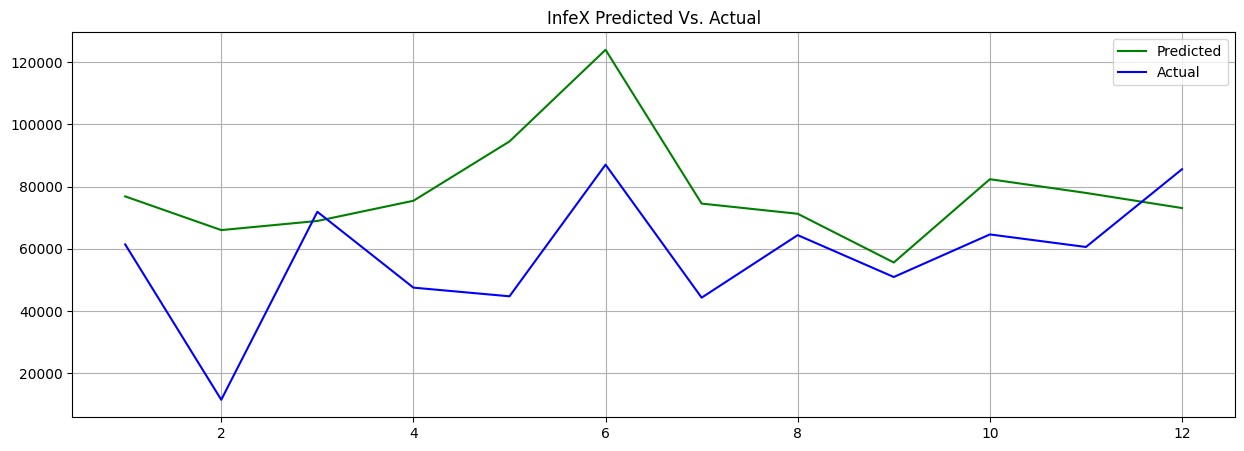

In [ ]:
print_accuracy(data_part1, data_part2, 'InfeX', 'Average')

#### Exponential Smoothing

In [ ]:
grid_search_options_CoughX = []
alpha = [0.2, 0.4, 0.6, 0.8]
t_params = ['add', 'mul']
d_params = [True, False]
s_params = ['add', 'mul']
p_params = [12]
b_params = [True, False]
r_params = [True, False]
for a in alpha:
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            grid_search_options_CoughX.append([a,t,d,s,p,b,r])
len(grid_search_options_CoughX)

128

In [ ]:
grid_search_options_InfeX = []
alpha = [0.2, 0.4, 0.6, 0.8]
t_params = [None]
d_params = [None]
s_params = [None]
p_params = [12]
b_params = [True, False]
r_params = [True, False]
for a in alpha:
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            grid_search_options_InfeX.append([a,t,d,s,p,b,r])
len(grid_search_options_InfeX)

16

[0.8, 'mul', False, 'mul', 12, False, False]


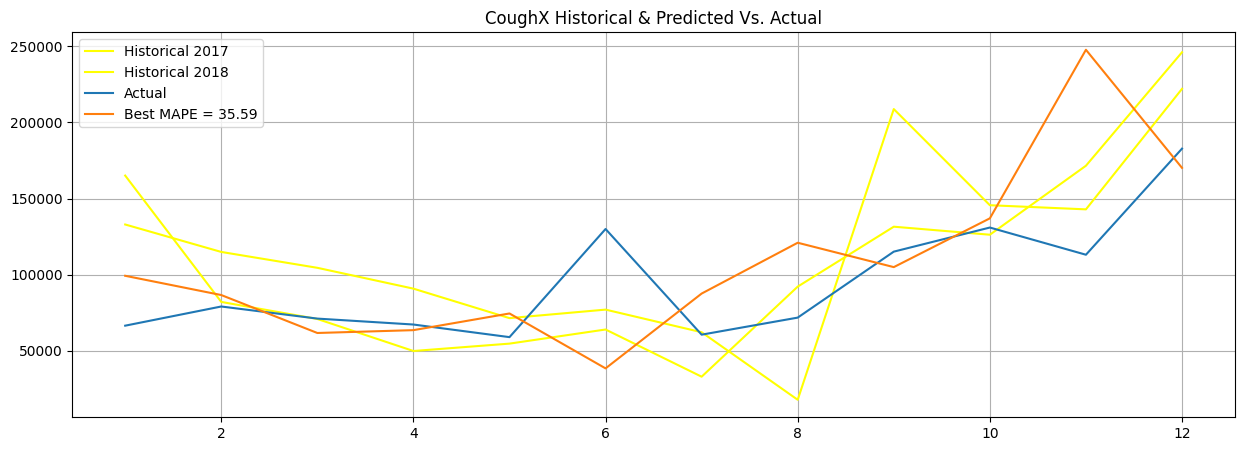

In [ ]:
pred_2019 = data_part1[data_part1['year']==2019]
actual_2019 = data_part2[data_part2['year']==2019]

min_mape = 100
min_mape_i = 0
i = 0
for [a,t,d,s,p,b,r] in grid_search_options_CoughX:
    i = i + 1

    if (t == None):
        model = ExponentialSmoothing(data_part1[data_part1['year'] < 2019]['CoughX'],
                                     trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)
    else:
        model = ExponentialSmoothing(data_part1[data_part1['year'] < 2019]['CoughX'],
                                     trend=t, damped=d, seasonal=s, seasonal_periods=p, use_boxcox=b)

    model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

    pred_2019[f'CoughX_exp_smooth_{i}'] = model_fit.forecast(13)
    mape = np.round(np.mean(np.abs(actual_2019['CoughX'] - pred_2019[f'CoughX_exp_smooth_{i}']) / actual_2019['CoughX']) * 100, 2)
    if mape <= min_mape:
        min_mape = mape
        min_mape_i = i

plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'CoughX Historical & Predicted Vs. Actual')

plt.plot(data_part1[data_part1['year'] == 2017]['month'], data_part1[data_part1['year'] == 2017]['CoughX'],
         label='Historical 2017', color='yellow')
plt.plot(data_part1[data_part1['year'] == 2018]['month'], data_part1[data_part1['year'] == 2018]['CoughX'],
         label='Historical 2018', color='yellow')
plt.plot(actual_2019['month'], actual_2019['CoughX'], label='Actual')

plt.plot(pred_2019['month'], pred_2019[f'CoughX_exp_smooth_{min_mape_i}'], label=f'Best MAPE = {min_mape}')

plt.legend()
print(grid_search_options_CoughX[i-1])

#### Outliers in InfeX

In [ ]:
data_part2['InfeX'].dropna().sort_values(ascending=True).tail(2)

22    106718.39
6     143253.18
Name: InfeX, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20700c1f8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20700c1fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20700c1f610>],
 'medians': [<matplotlib.lines.Line2D at 0x20700c50250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20700c504f0>],
 'means': []}

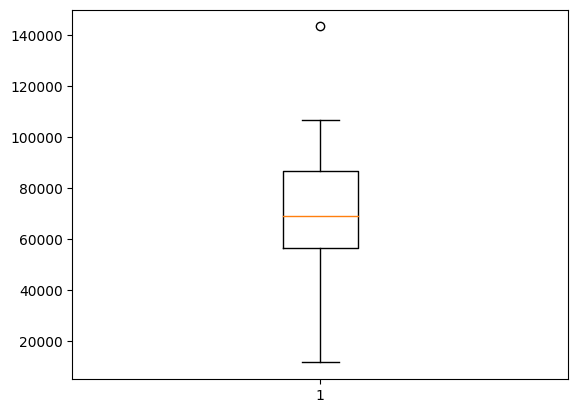

In [ ]:
plt.boxplot(data_part2['InfeX'].dropna())

In [ ]:
data_part2['InfeX_outliers_removed'] = data_part2['InfeX']
data_part2.loc[data_part2['InfeX'] > 106718.39, 'InfeX_outliers_removed'] = 106718.39

{'whiskers': [<matplotlib.lines.Line2D at 0x20700c8ecb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20700c8f1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20700c8ea10>],
 'medians': [<matplotlib.lines.Line2D at 0x20700c8f730>],
 'fliers': [<matplotlib.lines.Line2D at 0x20700c8f9d0>],
 'means': []}

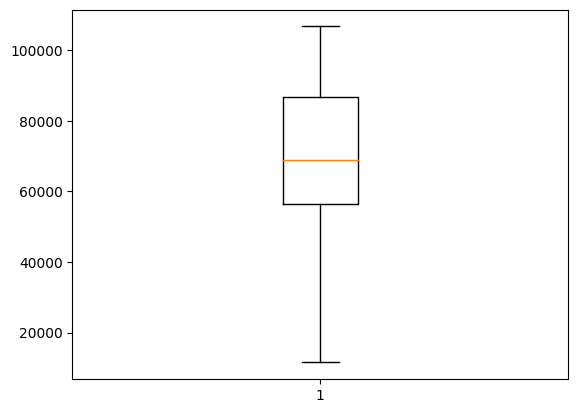

In [ ]:
plt.boxplot(data_part2['InfeX_outliers_removed'].dropna())

[0.8, None, None, None, 12, False, False]


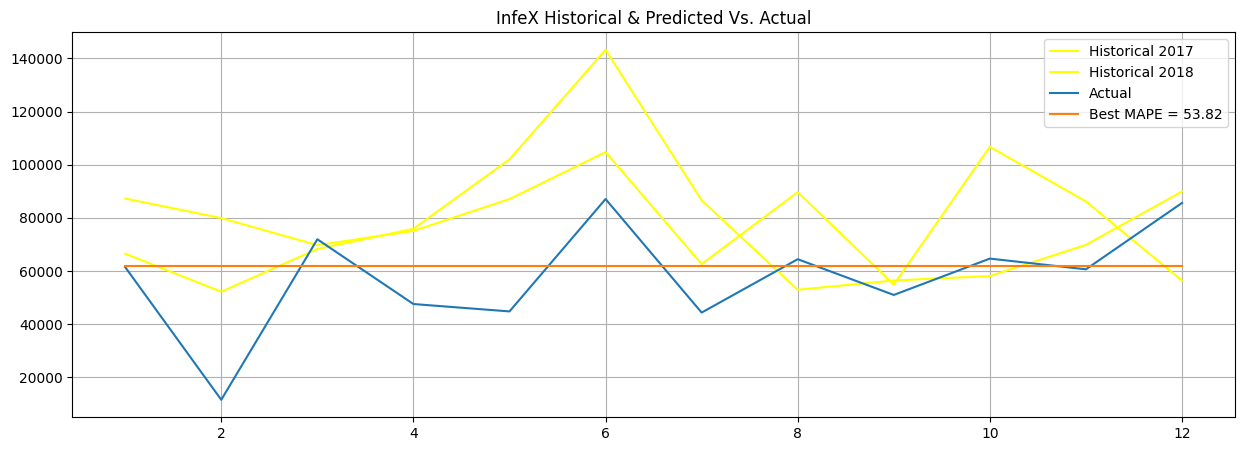

In [ ]:
pred_2019 = data_part1[data_part1['year']==2019]
actual_2019 = data_part2[data_part2['year']==2019]

min_mape = 100
min_mape_i = 0
i = 0
for [a,t,d,s,p,b,r] in grid_search_options_InfeX:
    i = i + 1

    if (t == None):
        model = ExponentialSmoothing(data_part2[data_part2['year'] < 2019]['InfeX_outliers_removed'],
                                     trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)
    else:
        model = ExponentialSmoothing(data_part2[data_part2['year'] < 2019]['InfeX_outliers_removed'],
                                     trend=t, damped=d, seasonal=s, seasonal_periods=p, use_boxcox=b)

    model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

    pred_2019[f'InfeX_exp_smooth_{i}'] = model_fit.forecast(13)
    mape = np.round(np.mean(np.abs(actual_2019['InfeX'] - pred_2019[f'InfeX_exp_smooth_{i}']) / actual_2019['InfeX']) * 100, 2)
    if mape <= min_mape:
        min_mape = mape
        min_mape_i = i

plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'InfeX Historical & Predicted Vs. Actual')

plt.plot(data_part1[data_part1['year'] == 2017]['month'], data_part1[data_part1['year'] == 2017]['InfeX'],
         label='Historical 2017', color='yellow')
plt.plot(data_part1[data_part1['year'] == 2018]['month'], data_part1[data_part1['year'] == 2018]['InfeX'],
         label='Historical 2018', color='yellow')
plt.plot(actual_2019['month'], actual_2019['InfeX'], label='Actual')

plt.plot(pred_2019['month'], pred_2019[f'InfeX_exp_smooth_{min_mape_i}'], label=f'Best MAPE = {min_mape}')

plt.legend()
print(grid_search_options_InfeX[i-1])

### 2020

In [ ]:
data_part2[['Date', 'CoughX', 'CoughX - Average', 'CoughX - Exp Smoothing']].to_csv('coughx_2020.csv', index=False)

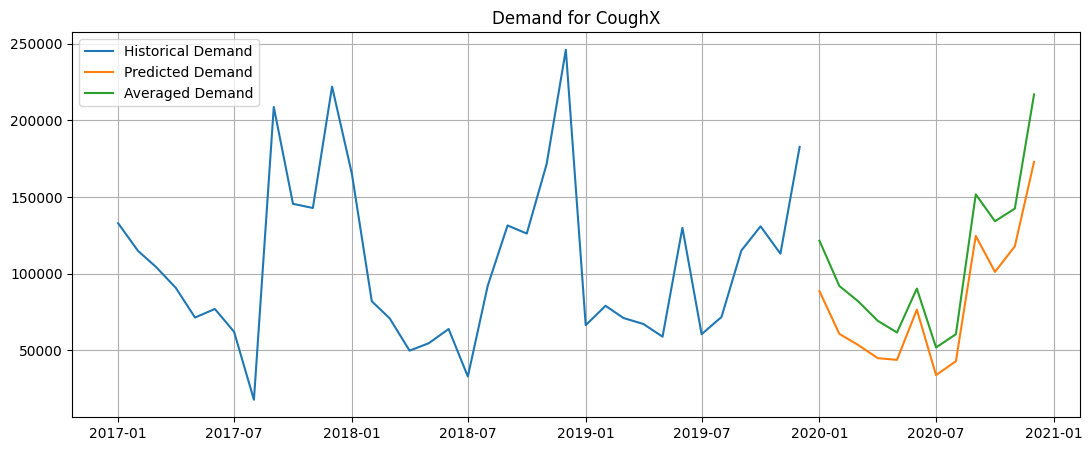

In [ ]:
a,t,d,s,p,b,r = [0.8, 'mul', False, 'mul', 12, False, False]
model = ExponentialSmoothing(data_part2[data_part2['year'] < 2020]['CoughX'],
                             trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)

model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

data_part2.loc[data_part2['year'] == 2020, 'CoughX - Exp Smoothing'] = model_fit.forecast(12).values

plt.figure(figsize=(13,5))
plt.title('Demand for CoughX')
plt.grid()
plt.plot(data_part2['Date'], data_part2['CoughX'], label='Historical Demand')
plt.plot(data_part2['Date'], data_part2['CoughX - Exp Smoothing'], label='Predicted Demand')
plt.plot(data_part2['Date'], data_part2['CoughX - Average'], label='Averaged Demand')

plt.legend()

In [ ]:
data_part2[['Date', 'CoughX', 'CoughX - Average', 'CoughX - Exp Smoothing']].to_csv('coughx_2020.csv', index=False)

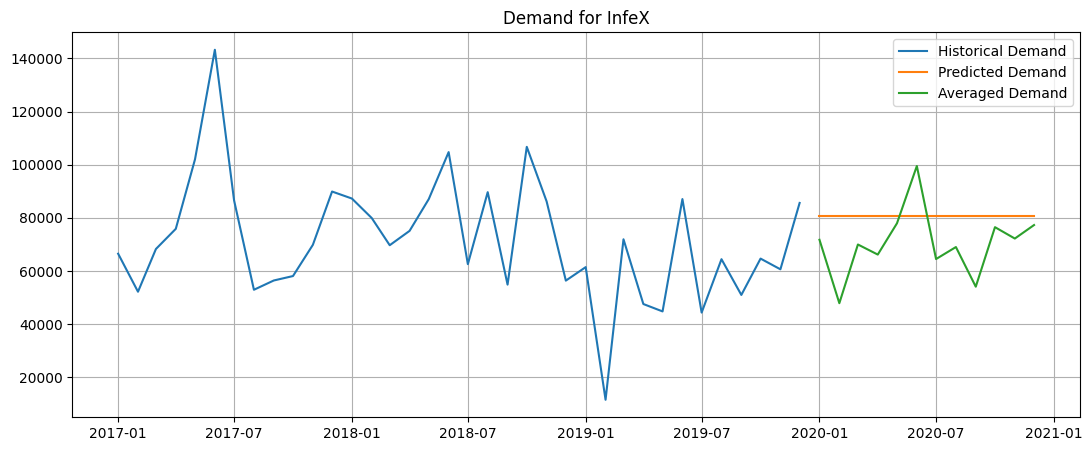

In [ ]:
a,t,d,s,p,b,r = [0.8, None, None, None, 12, False, False]
model = ExponentialSmoothing(data_part2[data_part2['year'] < 2020]['InfeX_outliers_removed'],
                             trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)

model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

data_part2.loc[data_part2['year'] == 2020, 'InfeX - Exp Smoothing'] = model_fit.forecast(12).values

plt.figure(figsize=(13,5))
plt.grid()
plt.title('Demand for InfeX')
plt.plot(data_part2['Date'], data_part2['InfeX'], label='Historical Demand')
plt.plot(data_part2['Date'], data_part2['InfeX - Exp Smoothing'], label='Predicted Demand')
plt.plot(data_part2['Date'], data_part2['InfeX - Avg'], label='Averaged Demand')

plt.legend()

In [ ]:
data_part2[['Date', 'InfeX', 'InfeX - Avg', 'InfeX - Exp Smoothing']].to_csv('infex_2020.csv', index=False)

### APPENDIX

#### Grid search with 80:20 split

[0.8, 'mul', False, 'mul', 12, False, False]


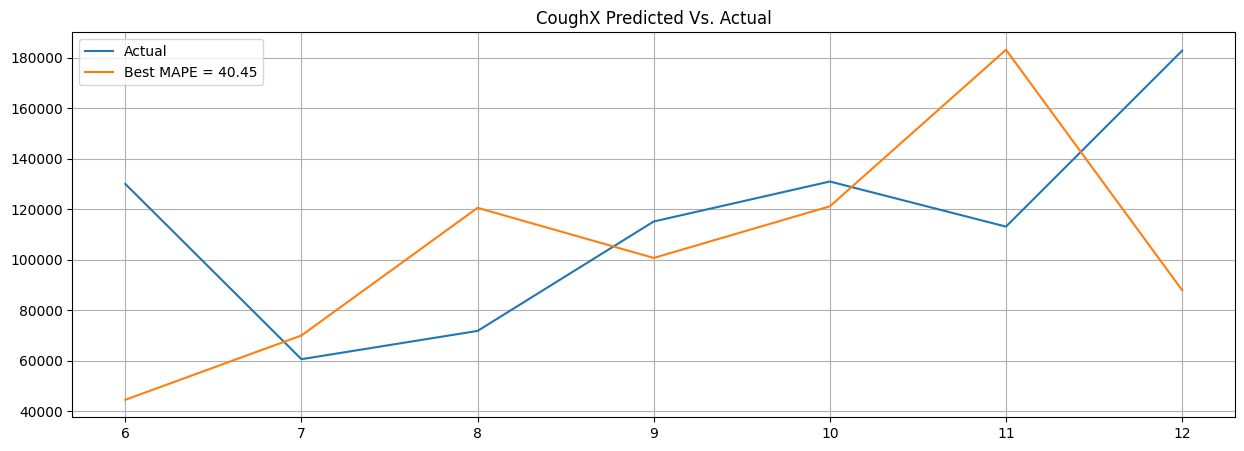

In [ ]:
min_mape = 100
min_mape_i = 0
i = 0

df_train = data_part2[data_part2['Date'] <= "2019-05-01"]
df_test = data_part2[(data_part2['Date'] > "2019-05-01") & (data_part2['year']==2019)]

for [a,t,d,s,p,b,r] in grid_search_options_CoughX:
    i = i + 1

    if (t == None):
        model = ExponentialSmoothing(df_train['CoughX'], trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)
    else:
        model = ExponentialSmoothing(df_train['CoughX'], trend=t, damped=d, seasonal=s, seasonal_periods=p, use_boxcox=b)

    model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

    df_test[f'CoughX_exp_smooth_{i}'] = model_fit.forecast(len(df_test)+1)

    mape = np.round(np.mean(np.abs(df_test['CoughX'] - df_test[f'CoughX_exp_smooth_{i}']) / df_test['CoughX']) * 100, 2)

    if mape <= min_mape:
        min_mape = mape
        min_mape_i = i

plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'CoughX Predicted Vs. Actual')

plt.plot(df_test['month'], df_test['CoughX'], label='Actual')
plt.plot(df_test['month'], df_test[f'CoughX_exp_smooth_{min_mape_i}'], label=f'Best MAPE = {min_mape}')

plt.legend()
print(grid_search_options_CoughX[i-1])

[0.8, None, None, None, 12, False, False]


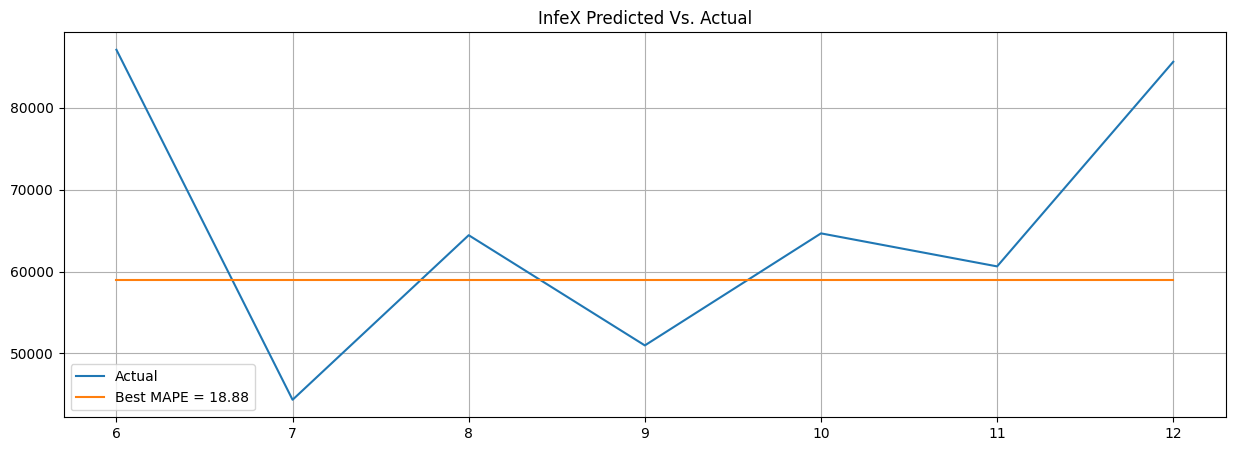

In [ ]:
min_mape = 100
min_mape_i = 0
i = 0

df_train = data_part2[data_part2['Date'] <= "2019-05-01"]
df_test = data_part2[(data_part2['Date'] > "2019-05-01") & (data_part2['year']==2019)]

for [a,t,d,s,p,b,r] in grid_search_options_InfeX:
    i = i + 1

    if (t == None):
        model = ExponentialSmoothing(df_train['InfeX_outliers_removed'], trend=t, seasonal=s, seasonal_periods=p, use_boxcox=b)
    else:
        model = ExponentialSmoothing(df_train['InfeX_outliers_removed'], trend=t, damped=d, seasonal=s, seasonal_periods=p, use_boxcox=b)

    model_fit = model.fit(optimized=True, remove_bias=r, smoothing_level=a)

    df_test[f'InfeX_exp_smooth_{i}'] = model_fit.forecast(len(df_test)+1)

    mape = np.round(np.mean(np.abs(df_test['InfeX'] - df_test[f'InfeX_exp_smooth_{i}']) / df_test['InfeX']) * 100, 2)

    if mape <= min_mape:
        min_mape = mape
        min_mape_i = i

plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'InfeX Predicted Vs. Actual')

plt.plot(df_test['month'], df_test['InfeX'], label='Actual')
plt.plot(df_test['month'], df_test[f'InfeX_exp_smooth_{min_mape_i}'], label=f'Best MAPE = {min_mape}')

plt.legend()
print(grid_search_options_InfeX[i-1])

### ARIMA

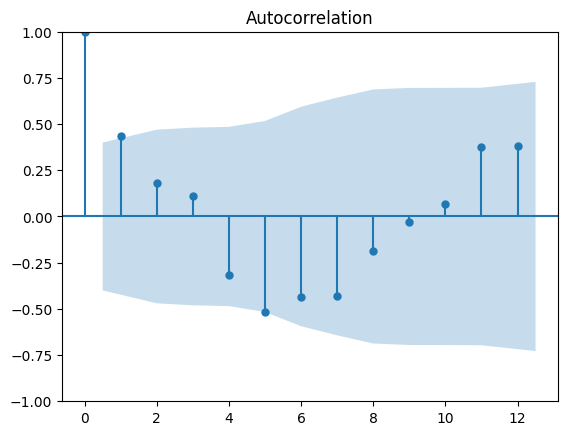

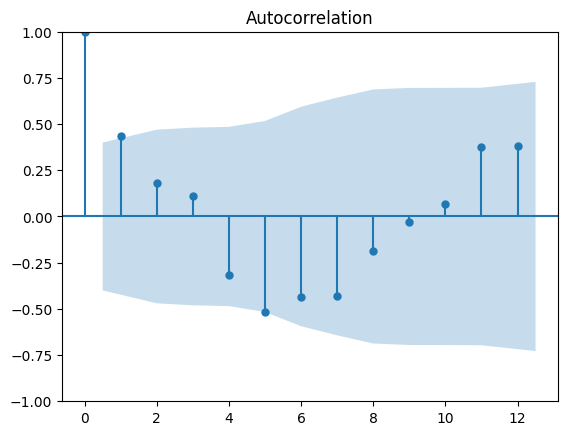

In [ ]:
plot_acf(data_part2[data_part2['year'] < 2019]['CoughX'], lags=12)

                               SARIMAX Results                                
Dep. Variable:                 CoughX   No. Observations:                   24
Model:                 ARIMA(8, 0, 2)   Log Likelihood                -285.785
Date:                Tue, 13 Dec 2022   AIC                            595.569
Time:                        20:45:32   BIC                            609.706
Sample:                             0   HQIC                           599.320
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.116e+05   4116.151     27.111      0.000    1.04e+05     1.2e+05
ar.L1         -0.1155      0.415     -0.279      0.781      -0.928       0.697
ar.L2          0.5951      0.665      0.895      0.3

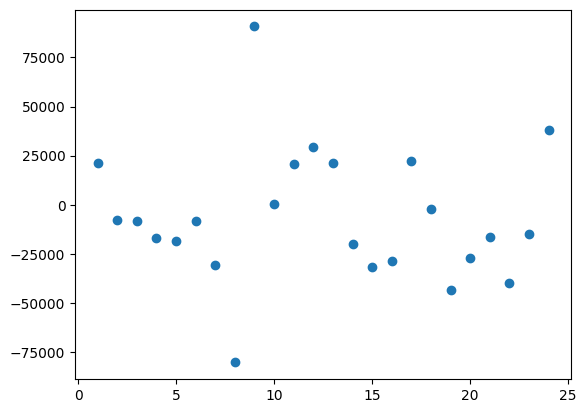

In [ ]:
model = ARIMA(data_part2[data_part2['year'] < 2019]['CoughX'], order=(8,0,2))
model_fit = model.fit()

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
plt.scatter(residuals.index, residuals)

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

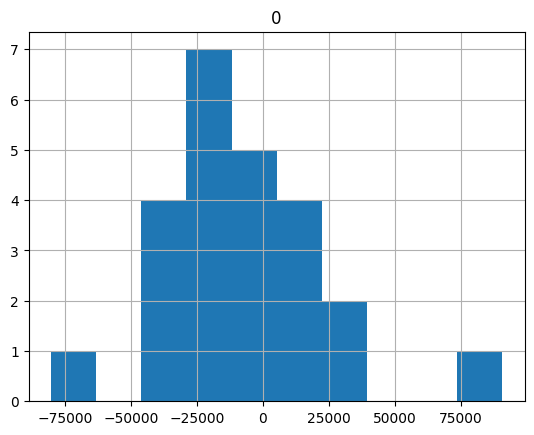

In [ ]:
residuals.hist()

In [ ]:
pred_2019['CoughX_ARIMA'] = model_fit.predict(start=25, end=36)
mape = np.round(np.mean(np.abs(actual_2019['CoughX'] - pred_2019['CoughX_ARIMA']) / actual_2019['CoughX']) * 100, 2)

In [ ]:
mape

30.52

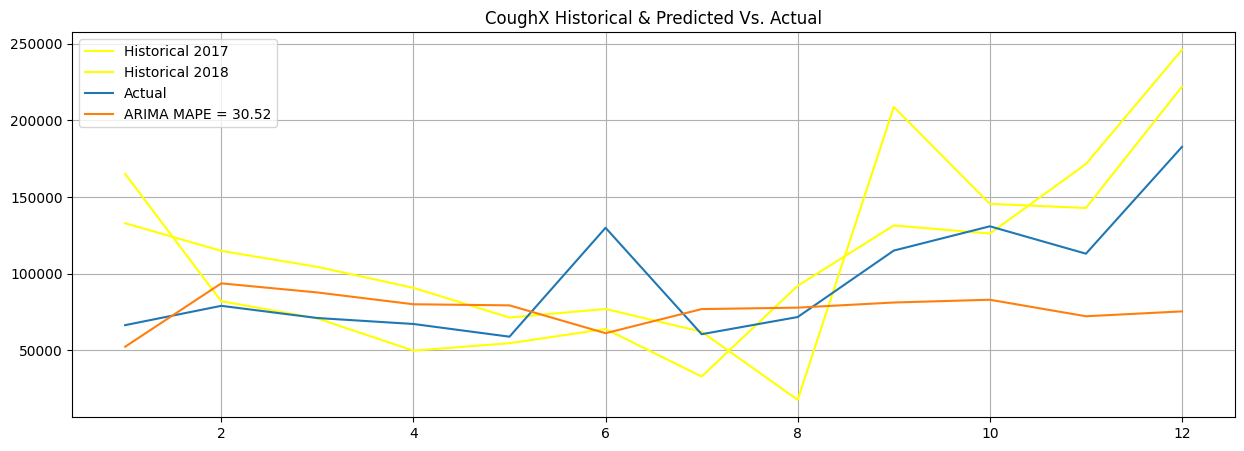

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'CoughX Historical & Predicted Vs. Actual')

plt.plot(data_part1[data_part1['year'] == 2017]['month'], data_part1[data_part1['year'] == 2017]['CoughX'],
         label='Historical 2017', color='yellow')
plt.plot(data_part1[data_part1['year'] == 2018]['month'], data_part1[data_part1['year'] == 2018]['CoughX'],
         label='Historical 2018', color='yellow')
plt.plot(actual_2019['month'], actual_2019['CoughX'], label='Actual')

plt.plot(pred_2019['month'], pred_2019['CoughX_ARIMA'], label=f'ARIMA MAPE = {mape}')

plt.legend()

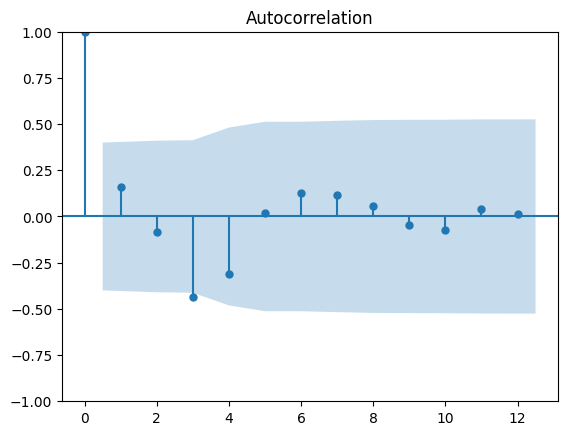

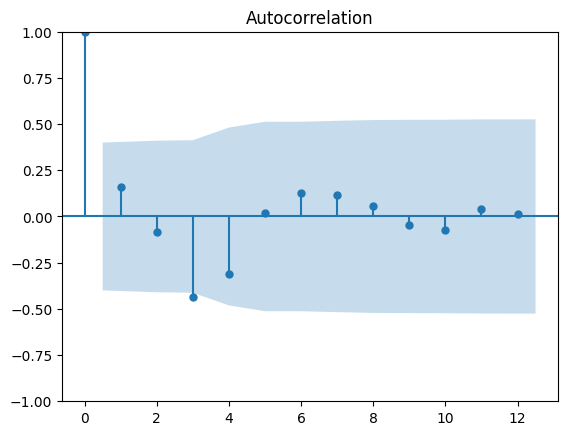

In [ ]:
plot_acf(data_part2[data_part2['year'] < 2019]['InfeX_outliers_removed'], lags=12)

                                 SARIMAX Results                                  
Dep. Variable:     InfeX_outliers_removed   No. Observations:                   24
Model:                     ARIMA(4, 0, 2)   Log Likelihood                -263.638
Date:                    Tue, 13 Dec 2022   AIC                            543.277
Time:                            20:45:36   BIC                            552.701
Sample:                                 0   HQIC                           545.777
                                     - 24                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.689e+04   3305.369     23.262      0.000    7.04e+04    8.34e+04
ar.L1         -0.5073      0.398     -1.274      0.203      -1.288       0.273
ar.L2         -0.242

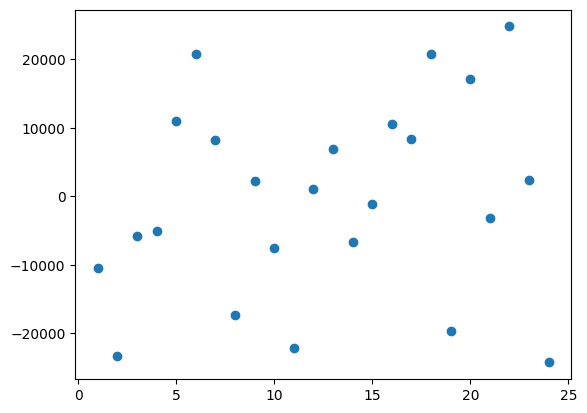

In [ ]:
model = ARIMA(data_part2[data_part2['year'] < 2019]['InfeX_outliers_removed'], order=(4,0,2))
model_fit = model.fit()

print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
plt.scatter(residuals.index, residuals)

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

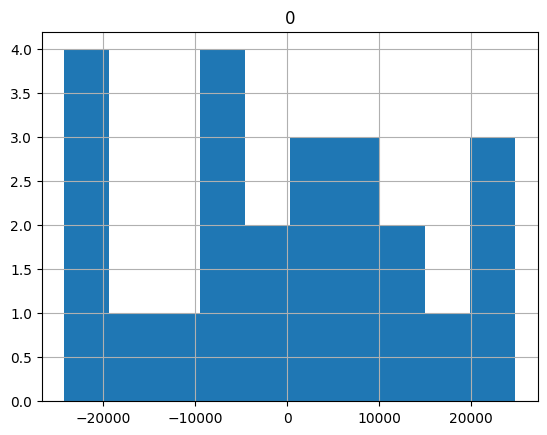

In [ ]:
residuals.hist()

In [ ]:
pred_2019['InfeX_ARIMA'] = model_fit.predict(start=25, end=36)
mape = np.round(np.mean(np.abs(actual_2019['InfeX'] - pred_2019['InfeX_ARIMA']) / actual_2019['InfeX']) * 100, 2)

In [ ]:
mape

94.93

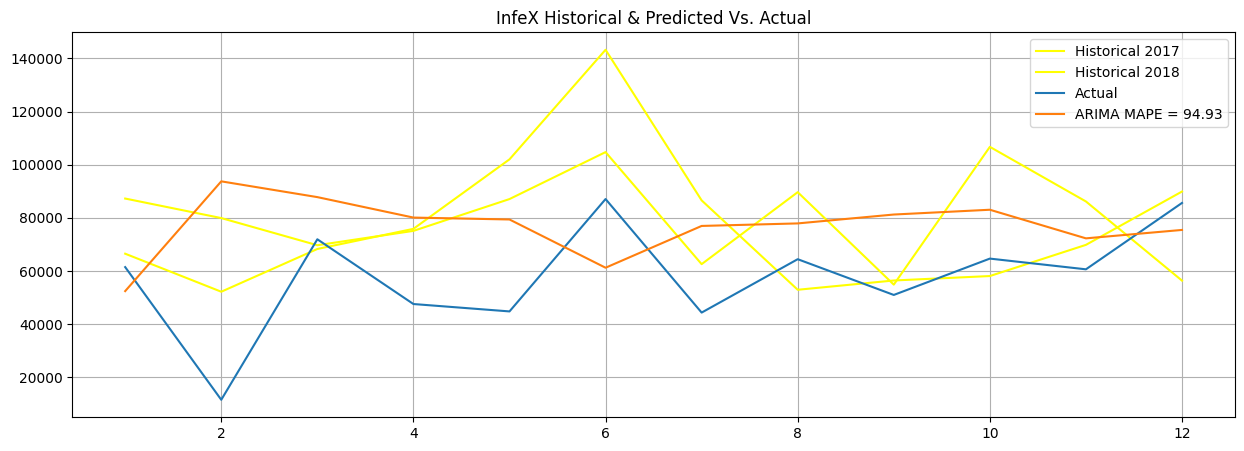

In [ ]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title(f'InfeX Historical & Predicted Vs. Actual')

plt.plot(data_part1[data_part1['year'] == 2017]['month'], data_part1[data_part1['year'] == 2017]['InfeX'],
         label='Historical 2017', color='yellow')
plt.plot(data_part1[data_part1['year'] == 2018]['month'], data_part1[data_part1['year'] == 2018]['InfeX'],
         label='Historical 2018', color='yellow')
plt.plot(actual_2019['month'], actual_2019['InfeX'], label='Actual')

plt.plot(pred_2019['month'], pred_2019['InfeX_ARIMA'], label=f'ARIMA MAPE = {mape}')

plt.legend()